## Antimeridian in GeoPandas, matplotlib, keplergl, folium, and leafmap. 

In [1]:
# %pip install geopandas folium leafmap keplergl

### GeoPandas

<Axes: >

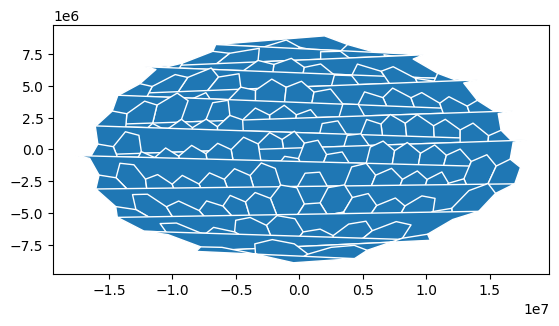

In [2]:
import geopandas as gpd

# Load the GeoJSON data
geojson_path = "https://raw.githubusercontent.com/opengeoshub/vgriddemo/refs/heads/main/antimeridian/data/h3_0_origin.geojson"
gdf = gpd.read_file(geojson_path)
# gdf.plot(edgecolor="white", linewidth=1)
gdf.to_crs("ESRI:54009").plot(edgecolor="white", linewidth=1)


### matplotlib

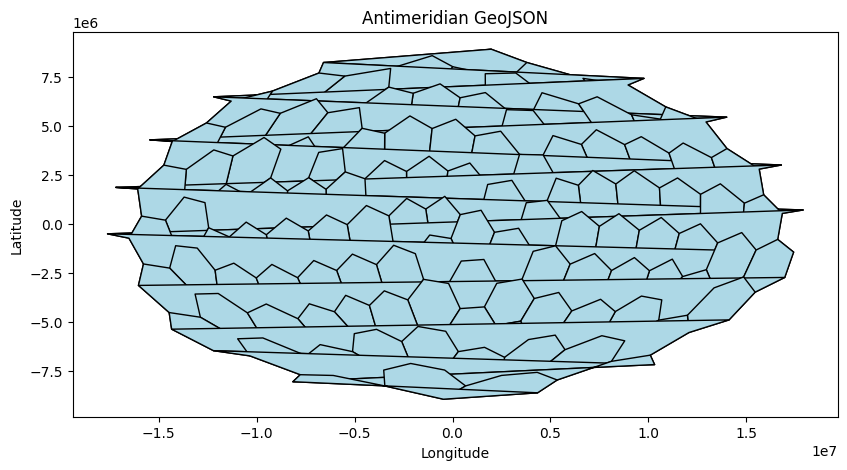

In [3]:
import matplotlib.pyplot as plt

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
# crs = 'EPSG:4326'
crs = 'proj=moll'
gdf.to_crs(crs).plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_title("Antimeridian GeoJSON")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal', adjustable='box')
plt.show()


### keplergl

In [ ]:
from keplergl import KeplerGl

kepler_map = KeplerGl(height=500)
kepler_map.add_data(data=gdf, name="H3 Antimeridian")
kepler_map


### folium

In [5]:
import folium

m_folium = folium.Map(location=[0, 0], tiles="CartoDB positron", zoom_start=1)
folium.GeoJson(
    gdf.to_json(),
    name="H3",
    style_function=lambda feature: {
        "color": "#1f78b4",
        "weight": 1,
        "fillColor": "#a6cee3",
        "fillOpacity": 0.4,
    },
).add_to(m_folium)

folium.LayerControl().add_to(m_folium)
m_folium



### leafmap

In [7]:
import leafmap

m = leafmap.Map(zoom=0)
m.add_gdf(gdf, layer_name="H3", style=dict(color="blue", fillColor="cyan", fillOpacity=0.3))
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…